In [23]:
import pygmt
import numpy as np
import os
import pandas as pd
from pyrocko import util, model, io, trace, gmtpy
import pyrocko.moment_tensor as pmt
from pyrocko.plot import beachball
import matplotlib.pyplot as plt

workdir='../'
catdir =  os.path.join(workdir,'CAT')

switch_VLP=False         ###SWITCH###

if switch_VLP:
    clustydir='../../clusty_flegrei/results_VLP'    
else:
    clustydir='../../clusty_flegrei/results_VT'   

clusty_filename= os.path.join(clustydir,'cat_trimmed_mean_ccs_dbscan_comb_0.150_3.yaml')  ###CHANGE###
           
clusty_events = model.load_events(clusty_filename)

In [24]:
cluster_number=4
cls_selected = [ev for ev in clusty_events if ev.extras['cluster_number'] == cluster_number ] # select only events from one cluster

### Open clusty results

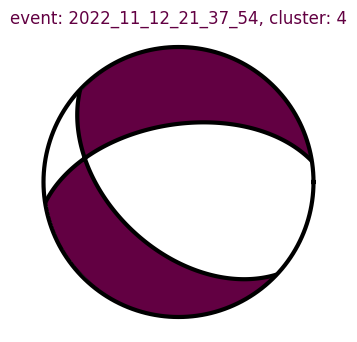

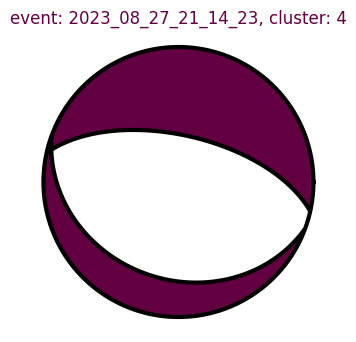

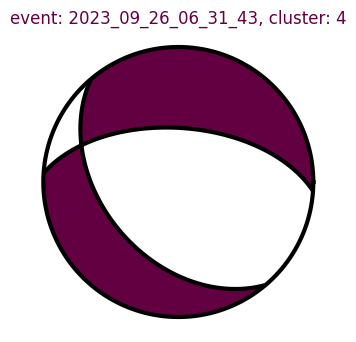

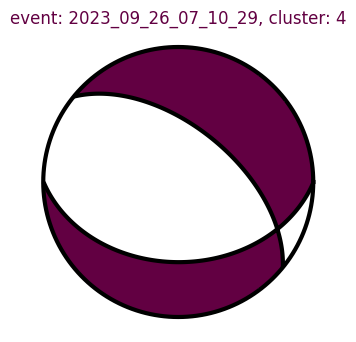

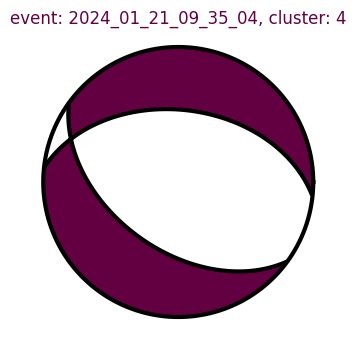

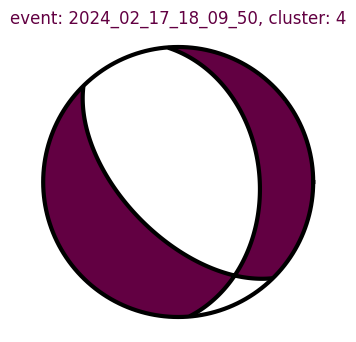

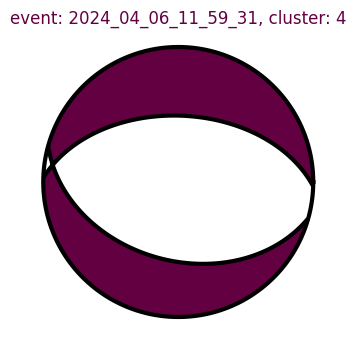

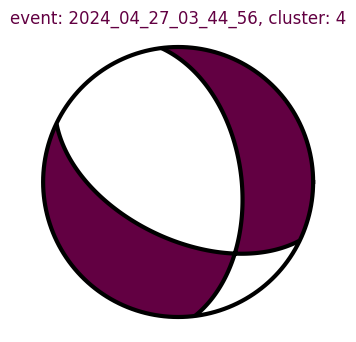

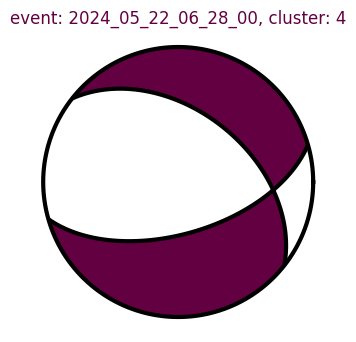

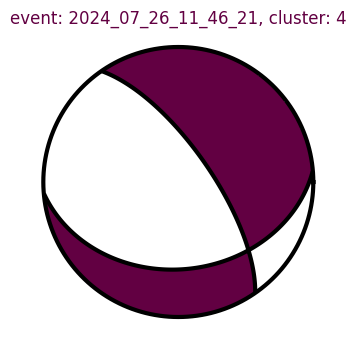

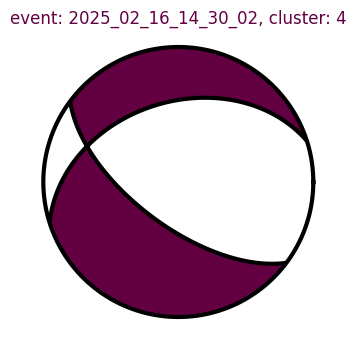

In [25]:
for i,ev in enumerate(cls_selected):
    fig = plt.figure(figsize=(3., 3.))
    fig.subplots_adjust(left=0., right=1., bottom=0., top=1.)
    axes = fig.add_subplot(1, 1, 1)

    plot_kwargs = {
        'beachball_type': 'dc',
        'size': 9,
        'position': (5, 5),
        'color_t': ev.extras['color'],
        'color_p':'white',
        'edgecolor': 'black',
        'best_color':'black',
        'linewidth':3, 
        'grid_resolution':800
        }
    
    beachball.plot_fuzzy_beachball_mpl_pixmap([ev.moment_tensor], axes,best_mt=ev.moment_tensor, **plot_kwargs)
    axes.set_xlim(0., 10.)
    axes.set_ylim(0., 10.)
    axes.set_axis_off()
    axes.set_title(f'event: {ev.name[8:]}, cluster: {cluster_number}',color=ev.extras['color'])
    # save
    #fig.savefig(f'../PLOTS/FUZZY_MT/fuzzy_mt_cluster_{key}.pdf')


plt.show()